<a href="https://colab.research.google.com/github/sridevibonthu/EIP4_Session1/blob/master/Session_1_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


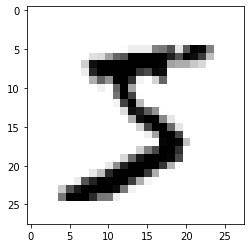

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0],cmap="gray_r")

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=12, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.1240 - acc: 0.9618
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0446 - acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0325 - acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.0255 - acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0189 - acc: 0.9936
Epoch 6/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.0168 - acc: 0.9947
Epoch 7/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.0144 - acc: 0.9952
Epoch 8/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0117 - acc: 0.9958
Epoch 9/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0109 - acc: 0.9962
Epoch 10/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.0093 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03688484263069972, 0.9927]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.10160243e-18 4.75231011e-17 1.96385855e-12 8.85442969e-11
  1.76342945e-23 1.19689230e-17 2.40082342e-24 1.00000000e+00
  1.12333073e-16 1.96972077e-13]
 [2.45093290e-12 1.28385461e-14 1.00000000e+00 1.05665322e-16
  9.08029775e-17 1.98783010e-27 1.65636954e-13 6.06356166e-19
  6.57622192e-16 1.31237814e-19]
 [1.37535014e-12 9.99996543e-01 2.45781084e-08 1.82803897e-10
  9.29168920e-08 1.70688311e-10 1.30944361e-11 3.41056943e-06
  1.39655354e-08 1.86412500e-11]
 [1.00000000e+00 1.10700250e-19 2.26910851e-12 1.03763423e-19
  8.61960910e-18 4.95627300e-16 5.54426460e-09 1.22940391e-19
  7.10731127e-12 1.88329390e-15]
 [5.98163058e-21 3.46147531e-16 5.67713724e-21 1.40010755e-20
  1.00000000e+00 6.89617375e-20 7.11259191e-18 1.54622959e-19
  1.33052605e-14 5.87348059e-10]
 [1.18468152e-10 9.99999642e-01 3.27800862e-08 1.70169448e-13
  4.36836478e-09 4.31144785e-13 1.57906593e-13 3.72278492e-07
  3.84601156e-10 2.45643696e-11]
 [4.25707435e-29 4.36261434e-16 5.07061409e-24 1.06836835e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(list(layer_dict.keys()))
layer_dict.pop('max_pooling2d_5')
layer_dict.pop('max_pooling2d_6')
layer_dict.pop('dense_5')
layer_dict.pop('dense_6')


['conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6', 'flatten_3', 'dense_5', 'dense_6', 'activation_3']


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()